In [1]:
import os
import sys
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)
from results_data import ResultsCELI
from results_data import open_pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

globalfont = 'DejaVu Sans'

In [2]:
matplotlib.font_manager.findfont('Cambria')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


'/home/moosetools/mambaforge3/envs/openmc-env/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [3]:
out = open_pkl(filename='homogenized_case1_upTo_stepNum_15.pkl')

In [4]:
# available functions:
# out.print_case_settings()
# out.get_BOS_keffs()
# out.get_BOS_isotope()
# out.get_BOS_power()
# out.get_corrector_keffs()
# out.get_BOS_AO
# need to make:
# out.get_corrector_power()
# out.get_corrector_isotope()

In [5]:
out.print_case_settings()

fissionable_mats: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
fissionable_mats_vols: [60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574]
residual_number_density: 1e-20
include_non_fission_material_power: True
print_transport_powers: True
system_IHM_mass_grams: 72133.56
specific_power: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
steplength_days: [0.5, 2, 2.5, 5, 10, 10, 10, 10, 20, 20, 20, 20, 20, 50, 50, 50, 50]
origen_predictor_divs: 2
addnuxdictbase: addnuxDicts/addnux3Dict.dict
base_triton: homogenized_base.inp
origen_base: baseOrigenFile.inp
origenResults_F71dir: OrigenResults_F71dir
MonteCarloResults_F33dir: MonteCarloResults_F33
Nprocs: 38
machinefile: nodes.1521871
tmp

In [6]:
BOS_keffs, BOS_sigmas, bu, time = out.get_BOS_keffs()

In [7]:
u5, bu, time = out.get_BOS_isotope(material_id=101, isotope='U-235')

In [8]:
out.get_corrector_keffs(step_num=0)

No corrector iterated keffs for step 0 since we did not do correc to iterations to get to this result.


(None, None)

In [9]:
out.keff_all

{0: {-1: ' best estimate system k-eff 1.23314 + or - 0.00018\n',
  0: ' best estimate system k-eff 1.19930 + or - 0.00016\n',
  1: ' best estimate system k-eff 1.19937 + or - 0.00020\n',
  2: ' best estimate system k-eff 1.19953 + or - 0.00016\n'},
 1: {-1: ' best estimate system k-eff 1.19958 + or - 0.00022\n',
  0: ' best estimate system k-eff 1.17942 + or - 0.00015\n',
  1: ' best estimate system k-eff 1.17921 + or - 0.00018\n',
  2: ' best estimate system k-eff 1.17974 + or - 0.00020\n'},
 2: {-1: ' best estimate system k-eff 1.17928 + or - 0.00019\n',
  0: ' best estimate system k-eff 1.17444 + or - 0.00016\n',
  1: ' best estimate system k-eff 1.17404 + or - 0.00020\n',
  2: ' best estimate system k-eff 1.17410 + or - 0.00016\n'},
 3: {-1: ' best estimate system k-eff 1.17401 + or - 0.00014\n',
  0: ' best estimate system k-eff 1.16718 + or - 0.00017\n',
  1: ' best estimate system k-eff 1.16682 + or - 0.00016\n',
  2: ' best estimate system k-eff 1.16675 + or - 0.00016\n'},
 4: 

In [10]:
out.print_methods()

available methods for postprocessing results:
out.print_case_settings()
out.get_BOS_keffs()
out.get_BOS_isotope()
out.get_BOS_power()
out.get_corrector_keffs()
out.get_BOS_AO

Plotting:
out.plot_BOS_power_map
out.plot_BOS_power_2d
out.plot_all_power_map
out.plot_BOS_isotopics_map



Need to make the following still
out.get_corrector_power()
out.get_corrector_isotope()
out.get_corrector_AO()


In [11]:
_, _, p = out.get_BOS_power()
p[0].values()

dict_values([0.026490132450662247, 0.038370191850959245, 0.050890254451272245, 0.061835309176545866, 0.07094535472677362, 0.07818039090195449, 0.08317541587707937, 0.08595042975214874, 0.08605043025215124, 0.08379541897709486, 0.07922539612698062, 0.07232036160180798, 0.06316531582657911, 0.05209526047630237, 0.03936519682598412, 0.027005135025675118])

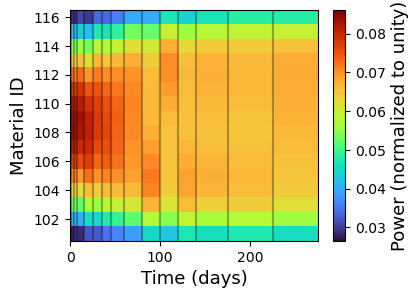

In [12]:
parr, BOS_time = out.plot_BOS_power_map(normalize=True, figsize=(4,3), cmap='turbo', fontname=globalfont,fontsize=13)

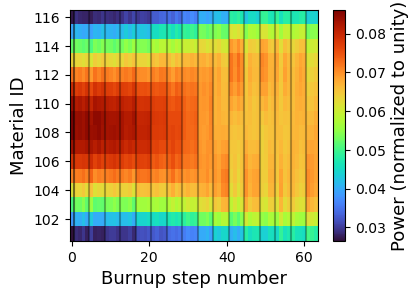

In [13]:
parr = out.plot_all_power_map(normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

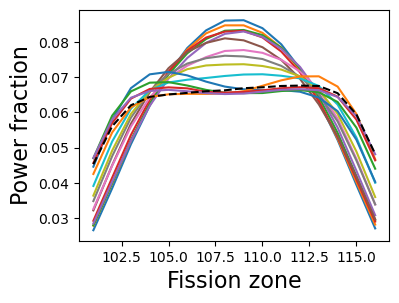

In [14]:
parr, BOS_time = out.plot_BOS_power_2d(normalize=True, figsize=(4,3), fontname=globalfont,fontsize=16)

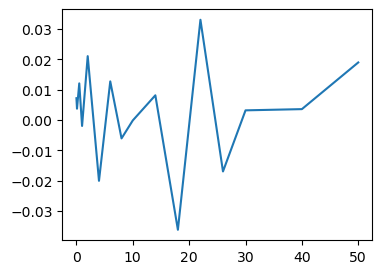

In [15]:
t, b, ao = out.get_BOS_AO()
figAO, axAO = plt.subplots(figsize=(4,3))
axAO.plot(t,ao)

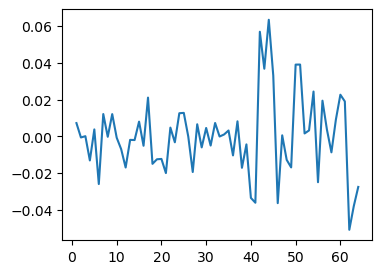

In [16]:
x, ao = out.get_all_AO()
figAO, axAO = plt.subplots(figsize=(4,3))
axAO.plot(x,ao)

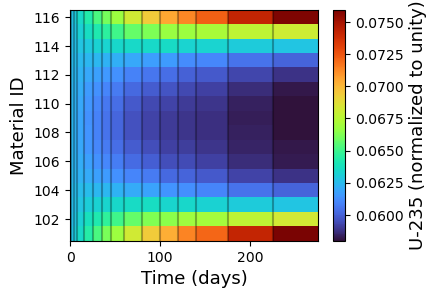

In [17]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

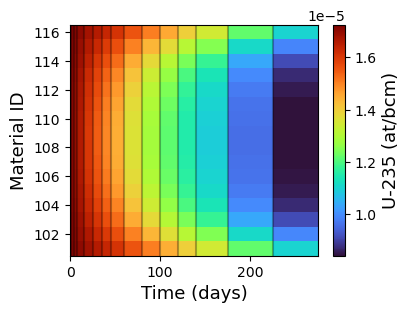

In [18]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

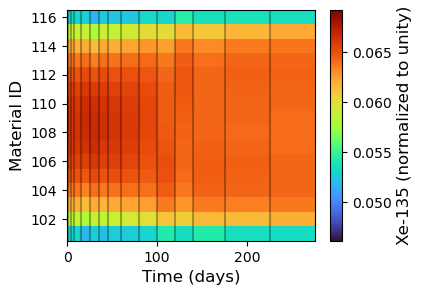

In [19]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=12, fontname=globalfont)

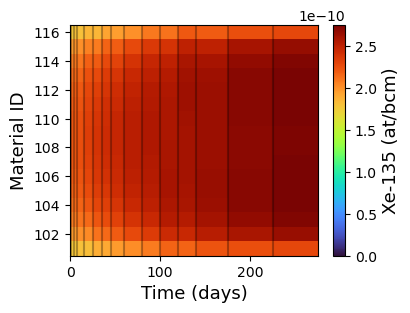

In [20]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

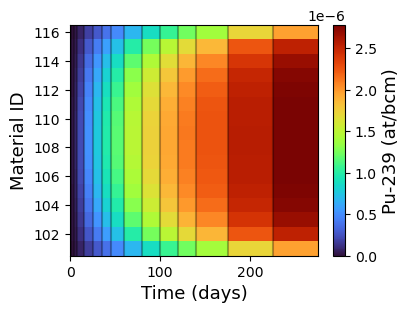

In [21]:
pu239arr = out.plot_BOS_isotopics_map(isotope='Pu-239',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

In [22]:
# plotting isotopics at end of every substep --->
# not working now but save for later when we make plot_all_isotopics_map

iso = 'U-235'

fissile_materials = out.BOS_power[0].keys()
for bigStep in out.isotopics_all.keys():
  for substep in out.isotopics_all[bigStep].keys():
    atom_dens_row = np.array([])
    for mat in fissile_materials:
      atom_dens_row = np.append(atom_dens_row, out.isotopics_all[bigStep][substep].material_dict[mat].return_iso_atom_dens(iso))



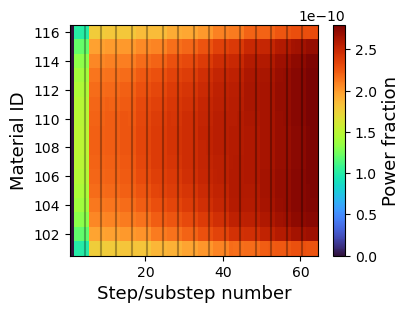

In [23]:
parr = out.plot_all_isotopics_map(isotope='Xe-135',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

In [24]:
parr

array([[1.00000000e-20, 9.98775811e-11, 9.98764227e-11, ...,
        2.26993166e-10, 2.27005668e-10, 2.27052410e-10],
       [1.00000000e-20, 1.19306145e-10, 1.19310931e-10, ...,
        2.67276004e-10, 2.67386195e-10, 2.67602635e-10],
       [1.00000000e-20, 1.31825159e-10, 1.31823413e-10, ...,
        2.75001819e-10, 2.75104366e-10, 2.75370731e-10],
       ...,
       [1.00000000e-20, 1.32777050e-10, 1.32779337e-10, ...,
        2.77830181e-10, 2.77927141e-10, 2.78164281e-10],
       [1.00000000e-20, 1.20521644e-10, 1.20513649e-10, ...,
        2.70346460e-10, 2.70437445e-10, 2.70662568e-10],
       [1.00000000e-20, 1.00846609e-10, 1.00848661e-10, ...,
        2.29487984e-10, 2.29544547e-10, 2.29661983e-10]])

In [25]:
out.isotopics_all

{0: {-1: <getComps.material_lib at 0x7fbe151120d0>,
  0: <getComps.material_lib at 0x7fbe15128ad0>,
  1: <getComps.material_lib at 0x7fbe1512abd0>,
  2: <getComps.material_lib at 0x7fbe15134d10>},
 1: {-1: <getComps.material_lib at 0x7fbe15134d10>,
  0: <getComps.material_lib at 0x7fbe15136e50>,
  1: <getComps.material_lib at 0x7fbe1513cf90>,
  2: <getComps.material_lib at 0x7fbe1513f090>},
 2: {-1: <getComps.material_lib at 0x7fbe1513f090>,
  0: <getComps.material_lib at 0x7fbe15149210>,
  1: <getComps.material_lib at 0x7fbe1514b310>,
  2: <getComps.material_lib at 0x7fbe1514d450>},
 3: {-1: <getComps.material_lib at 0x7fbe1514d450>,
  0: <getComps.material_lib at 0x7fbe1514f590>,
  1: <getComps.material_lib at 0x7fbe1515d550>,
  2: <getComps.material_lib at 0x7fbe1515f650>},
 4: {-1: <getComps.material_lib at 0x7fbe1515f650>,
  0: <getComps.material_lib at 0x7fbe151697d0>,
  1: <getComps.material_lib at 0x7fbe1516b8d0>,
  2: <getComps.material_lib at 0x7fbe15171a10>},
 5: {-1: <getCo

In [27]:
import powerFromOutput

keys = np.linspace(101, 116, 16)
t0 = 0
t1 = 1

p0 = np.random.rand(16)*200
p1 = np.random.rand(16)*210
p0D = {}
p1D = {}
for idx, key in enumerate(keys):
  p0D[key] = p0[idx]
  p1D[key] = p1[idx]

times = np.linspace(t0, t1, 10)
times_start = times[0:-1]
times_end = times[1:]
times = times_start/2 + times_end/2

interpd = powerFromOutput.interpolatePower(power_by_step_t0=p0D, power_by_step_t1=p1D, times=times, start_time=t0, end_time=t1)


In [28]:
import pandas as pd
df = pd.DataFrame(interpd)

df.to_excel('testing.xlsx')

{101.0: array([51.88288454, 47.53917034, 43.19545614, 38.85174193, 34.50802773,
        30.16431352, 25.82059932, 21.47688511, 17.13317091]),
 102.0: array([106.90072758,  95.93674293,  84.97275828,  74.00877363,
         63.04478898,  52.08080434,  41.11681969,  30.15283504,
         19.18885039]),
 103.0: array([ 79.83885907,  93.98535835, 108.13185763, 122.27835692,
        136.4248562 , 150.57135548, 164.71785476, 178.86435405,
        193.01085333]),
 104.0: array([15.96891015, 19.7214291 , 23.47394806, 27.22646702, 30.97898597,
        34.73150493, 38.48402388, 42.23654284, 45.9890618 ]),
 105.0: array([135.34817003, 134.17532325, 133.00247648, 131.8296297 ,
        130.65678292, 129.48393615, 128.31108937, 127.13824259,
        125.96539582]),
 106.0: array([61.56811455, 64.45008397, 67.33205339, 70.21402281, 73.09599223,
        75.97796165, 78.85993107, 81.74190049, 84.62386991]),
 107.0: array([ 94.71444626, 100.91799819, 107.12155012, 113.32510205,
        119.52865398, 125.